# Pr√©vision de la Consommation √âlectrique Fran√ßaise

Ce notebook a pour objectif de construire un mod√®le de pr√©vision de la consommation √©lectrique quotidienne en France, en se basant sur les donn√©es historiques fournies par RTE.

**Plan :**
1.  Importation des biblioth√®ques et fonctions utilitaires.
2.  Chargement et premier aper√ßu des donn√©es.
3.  Feature Engineering : Cr√©ation de caract√©ristiques temporelles.
4.  Analyse Exploratoire et Visualisation.
5.  Pr√©traitement des donn√©es (gestion des valeurs manquantes, outliers si n√©cessaire).
6.  Entra√Ænement et √©valuation de diff√©rents mod√®les de pr√©vision.
7.  Conclusion et s√©lection du meilleur mod√®le.

---

## 1. Importation des Biblioth√®ques et Fonctions

Importons d'abord les biblioth√®ques Python n√©cessaires pour l'analyse de donn√©es, la visualisation et le machine learning. Nous importons √©galement des fonctions personnalis√©es stock√©es dans le dossier `Functions` (situ√© au m√™me niveau que le dossier `data` et le dossier contenant ce notebook) pour garder ce notebook clair et modulaire.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
sys.path.append('..')  # Ajoute le dossier Functions au chemin de recherche
from Functions.ImportData import load_data
from Functions.features_engineering import extract_dayMonth
from Functions.features_engineering import extract_features
from Functions.models import train_linear_regression
from Functions.xgboost_model import train_xgboost
from Functions.models import train_random_forest
from Functions.Graphique import consommation_moyenne
from Functions.Graphique import plot_consommation_par_annee

## 2. Chargement des Donn√©es

Nous allons maintenant charger les donn√©es de consommation √©lectrique √† partir des fichiers CSV en utilisant notre fonction personnalis√©e `load_data`. Cette fonction prend en argument le chemin vers le dossier contenant les donn√©es. Nous affichons ensuite les premi√®res lignes pour v√©rifier le chargement et la structure initiale.

In [ ]:
# Remonter d'un niveau par rapport au r√©pertoire actuel (Notebook)
data_path = os.path.join(os.getcwd(), '..', 'data')

# Convertir le chemin en chemin absolu
data_path = os.path.abspath(data_path)

# Charger les donn√©es
data = load_data(data_path)

# Afficher un aper√ßu des donn√©es
data.head(10)


Nobs        jour  consommation  Ann√©e
0     1  2008-01-01   2933570.806   2008
1     2  2008-01-02   3462418.351   2008
2     3  2008-01-03   3587632.181   2008
3     4  2008-01-04   3433062.753   2008
4     5  2008-01-05   3061099.826   2008
5     6  2008-01-06   2801619.562   2008
6     7  2008-01-07   3144017.218   2008
7     8  2008-01-08   3325199.453   2008
8     9  2008-01-09   3311523.485   2008
9    10  2008-01-10   3306639.626   2008

## 3. Feature Engineering Initial : Extraction des Caract√©ristiques Temporelles

La consommation d'√©lectricit√© d√©pend fortement de facteurs temporels (heure de la journ√©e, jour de la semaine, mois, saison, ann√©e). Nous allons extraire ces informations √† partir de la colonne `jour` pour les utiliser comme caract√©ristiques (features) dans nos mod√®les.

Nous utilisons ici la fonction personnalis√©e `extract_dayMonth`.

In [ ]:
data = extract_dayMonth(data,'jour')
data.head(10)

Nobs       jour  consommation  Ann√©e  Jour_semaine  Mois  Numero_jour  \
0     1 2008-01-01   2933570.806   2008             1     1            1   
1     2 2008-01-02   3462418.351   2008             2     1            2   
2     3 2008-01-03   3587632.181   2008             3     1            3   
3     4 2008-01-04   3433062.753   2008             4     1            4   
4     5 2008-01-05   3061099.826   2008             5     1            5   
5     6 2008-01-06   2801619.562   2008             6     1            6   
6     7 2008-01-07   3144017.218   2008             0     1            7   
7     8 2008-01-08   3325199.453   2008             1     1            8   
8     9 2008-01-09   3311523.485   2008             2     1            9   
9    10 2008-01-10   3306639.626   2008             3     1           10   

   Annee  
0   2008  
1   2008  
2   2008  
3   2008  
4   2008  
5   2008  
6   2008  
7   2008  
8   2008  
9   2008

## 4. Analyse Exploratoire : Visualisation Initiale

Commen√ßons l'analyse exploratoire par une visualisation simple mais importante : la consommation √©lectrique moyenne pour chaque jour de l'ann√©e. Cela nous aidera √† identifier des cycles saisonniers annuels (par exemple, consommation plus √©lev√©e en hiver). Nous utilisons la fonction personnalis√©e `consommation_moyenne` en groupant par `Numero_jour` (qui repr√©sente ici le jour de l'ann√©e, 1 √† 366).

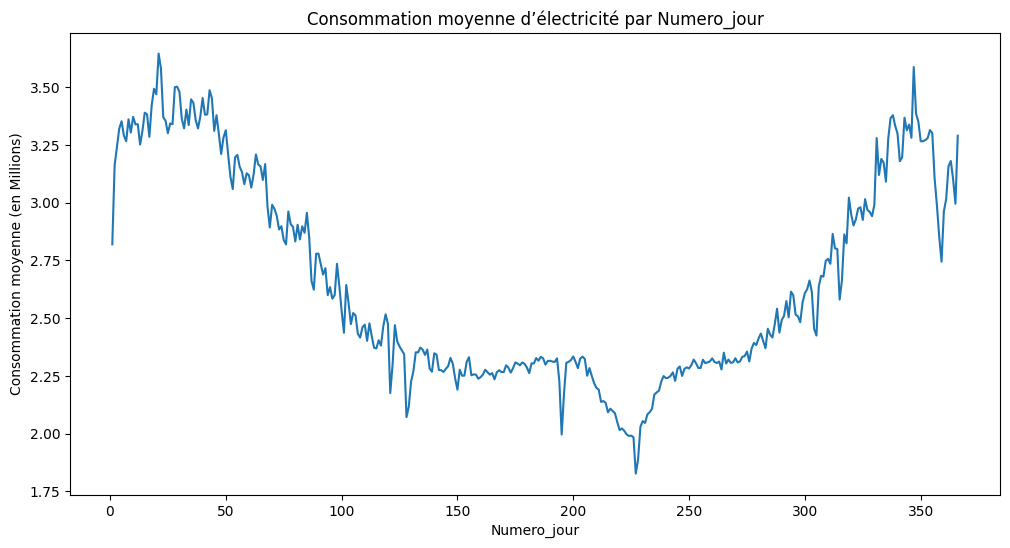

In [ ]:
# In [4]:
print("Affichage de la consommation moyenne par jour de l'ann√©e...")

# Utiliser la fonction personnalis√©e pour g√©n√©rer et afficher le graphique
consommation_moyenne(data, "Numero_jour") 

## 5. Visualisation : Consommation Annuelle

Pour compl√©ter notre premi√®re analyse, visualisons l'√©volution de la consommation totale (ou moyenne) ann√©e par ann√©e. Cela peut r√©v√©ler des tendances √† long terme (augmentation ou diminution de la consommation globale) ou des ann√©es atypiques. Nous utilisons la fonction personnalis√©e `plot_consommation_par_annee`.

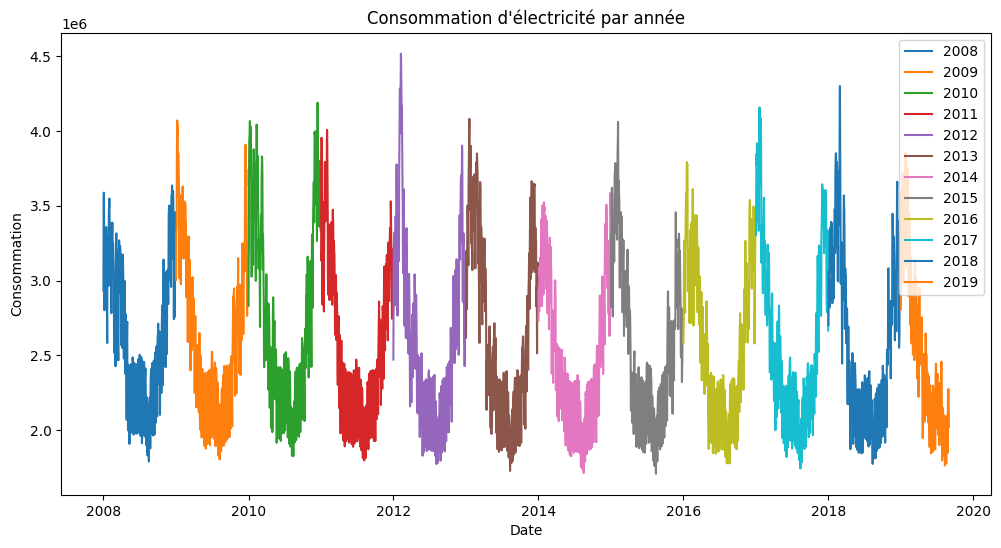

In [ ]:
# In [5]: 
print("Affichage de la consommation par ann√©e...")

# Utiliser la fonction personnalis√©e pour g√©n√©rer et afficher le graphique
plot_consommation_par_annee(data) 

## 6. Feature Engineering : Encodage Cyclique des Caract√©ristiques Temporelles
Les caract√©ristiques temporelles comme le jour de l'ann√©e, le mois ou le jour de la semaine sont cycliques (ex: apr√®s d√©cembre vient janvier, apr√®s dimanche vient lundi). Pour que les mod√®les (notamment lin√©aires) comprennent cette cyclicit√©, il est pr√©f√©rable de les transformer. Une m√©thode courante est d'utiliser les fonctions sinus et cosinus.

Nous appliquons cette transformation en utilisant la fonction `extract_features`. Cette fonction cr√©e de nouvelles colonnes (par exemple, `sin_jour_annee`, `cos_jour_annee`, etc.).

In [ ]:
# Appliquer l'encodage cyclique sinus/cosinus aux caract√©ristiques temporelles
data = extract_features(data)

# Afficher les premi√®res lignes pour voir les nouvelles colonnes d'encodage cyclique
print("Aper√ßu apr√®s ajout des caract√©ristiques cycliques :")
display(data.head(10)) 

Nobs       jour  consommation  Ann√©e  Annee  sin_jour_annee  \
0     1 2008-01-01    2933570.81   2008   2008            0.02   
1     2 2008-01-02    3462418.35   2008   2008            0.03   
2     3 2008-01-03    3587632.18   2008   2008            0.05   
3     4 2008-01-04    3433062.75   2008   2008            0.07   
4     5 2008-01-05    3061099.83   2008   2008            0.09   
5     6 2008-01-06    2801619.56   2008   2008            0.10   
6     7 2008-01-07    3144017.22   2008   2008            0.12   
7     8 2008-01-08    3325199.45   2008   2008            0.14   
8     9 2008-01-09    3311523.49   2008   2008            0.15   
9    10 2008-01-10    3306639.63   2008   2008            0.17   

   cos_jour_annee  sin_jour  cos_jour  sin_mois  cos_mois  
0            1.00      0.78      0.62      0.50      0.87  
1            1.00      0.97     -0.22      0.50      0.87  
2            1.00      0.43     -0.90      0.50      0.87  
3            1.00     -0.43     -0.90      0.50      0.87  
4            1.00     -0.97     -0.22      0.50      0.87  
5            0.99     -0.78      0.62      0.50      0.87  
6            0.99      0.00      1.00      0.50      0.87  
7            0.99      0.78      0.62      0.50      0.87  
8            0.99      0.97     -0.22      0.50      0.87  
9            0.99      0.43     -0.90      0.50      0.87

# II. Mod√©lisation

Maintenant que nos donn√©es sont pr√©par√©es et nos caract√©ristiques cr√©√©es, nous pouvons passer √† la phase de mod√©lisation.

## 7. Pr√©paration des Donn√©es : Division Train/Test

Avant d'entra√Æner un mod√®le, il est crucial de diviser notre jeu de donn√©es en deux ensembles :
* Un ensemble d' **entra√Ænement** (train set) sur lequel le mod√®le apprendra.
* Un ensemble de **test** (test set) sur lequel nous √©valuerons la performance du mod√®le sur des donn√©es qu'il n'a jamais vues.

Nous d√©finissons `X` comme l'ensemble de nos caract√©ristiques (features) et `y` comme notre variable cible (`consommation`). Nous retirons de `X` la cible, ainsi que les colonnes non pertinentes ou redondantes (`Nobs`, `jour`, `Ann√©e`, `Annee`).

Split des donn√©es en train et test avant la mod√©lisation

In [ ]:
# In [7]:
from sklearn.model_selection import train_test_split

# D√©finir les caract√©ristiques (X) et la cible (y)
# On retire la cible 'consommation' et les colonnes non utiles/redondantes:
# Nobs: simple identifiant
# jour: date brute, remplac√©e par les features temporelles/cycliques
# Ann√©e: ancienne colonne ann√©e (redondante avec Annee ou features cycliques)
# Annee: ann√©e brute, remplac√©e par features cycliques (sin/cos annee)
X = data.drop(['consommation', 'Nobs', 'Ann√©e', 'Annee', 'jour'], axis=1) 
y = data['consommation']

# Diviser les donn√©es en ensembles d'entra√Ænement (80%) et de test (20%)
# random_state assure la reproductibilit√© de la division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensions de l'ensemble d'entra√Ænement (X_train):", X_train.shape)
print("Dimensions de l'ensemble de test (X_test):", X_test.shape)
print("Colonnes utilis√©es comme features (X):", X.columns.tolist())

## 8. V√©rification Finale des Donn√©es (Features X)

V√©rifions rapidement les informations des donn√©es *compl√®tes* avant la mod√©lisation pour confirmer les types de donn√©es des caract√©ristiques que nous allons utiliser.

In [ ]:
# In [8]:
# Afficher les informations sur le DataFrame complet (avant drop/split) pour voir toutes les colonnes disponibles
print("Informations sur le DataFrame avant s√©lection de X:")
data.info()

# Afficher les informations sur le DataFrame X (nos features)
print("\nInformations sur les features (X) utilis√©es pour la mod√©lisation:")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4261 entries, 0 to 4260
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Nobs            4261 non-null   int64         
 1   jour            4261 non-null   datetime64[ns]
 2   consommation    4261 non-null   float64       
 3   Ann√©e           4261 non-null   int64         
 4   Annee           4261 non-null   int32         
 5   sin_jour_annee  4261 non-null   float64       
 6   cos_jour_annee  4261 non-null   float64       
 7   sin_jour        4261 non-null   float64       
 8   cos_jour        4261 non-null   float64       
 9   sin_mois        4261 non-null   float64       
 10  cos_mois        4261 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int32(1), int64(2)
memory usage: 349.7 KB


## 9. Entra√Ænement du Mod√®le de Base : R√©gression Lin√©aire

Commen√ßons par entra√Æner un mod√®le simple : la R√©gression Lin√©aire. Cela nous servira de r√©f√©rence (baseline) pour √©valuer des mod√®les plus complexes par la suite.

Nous utilisons notre fonction `train_linear_regression` (qui a √©t√© mise √† jour pour retourner le mod√®le entra√Æn√©, les pr√©dictions sur l'ensemble de test, l'erreur quadratique moyenne (MSE) et le score R¬≤).

In [ ]:
# Entra√Æner le mod√®le de R√©gression Lin√©aire en utilisant la fonction personnalis√©e
# La fonction utilise X_train, y_train pour l'entra√Ænement 
# et X_test, y_test pour l'√©valuation (calcul de MSE et R¬≤)
RL_results = train_linear_regression(X_train, y_train, X_test, y_test)

Affichons les r√©sultats de la R√©gression Lin√©aire. Nous nous int√©ressons principalement aux m√©triques d'√©valuation :
* **MSE (Mean Squared Error)** : Erreur quadratique moyenne. Plus elle est basse, meilleur est le mod√®le. Elle est dans l'unit√© de la cible au carr√©.
* **R¬≤ (Coefficient de D√©termination)** : Proportion de la variance de la variable cible qui est expliqu√©e par le mod√®le. Va de -‚àû √† 1. Plus il est proche de 1, meilleur est le mod√®le.

In [ ]:
# Afficher les r√©sultats de mani√®re lisible
print(f"Mod√®le Entra√Æn√© : {RL_results['model']}") 
print(f"MSE (Mean Squared Error) sur l'ensemble de test : {RL_results['mse']:.2f}") 
print(f"Score R¬≤ sur l'ensemble de test : {RL_results['r2']:.4f}") 

# Afficher quelques pr√©dictions vs valeurs r√©elles pour comparaison
# predictions_df = pd.DataFrame({'R√©el': y_test, 'Pr√©dit': RL_results['predictions']})
# display(predictions_df.head())

{'model': LinearRegression(),
 'predictions': array([2259527.35255884, 1826088.75208292, 2754437.17908846,
        3416876.37805856, 3428748.94176084, 2325362.29695682,
        1932304.2515394 , 2623058.45418958, 2400594.8027995 ,
        2649509.59025766, 2356763.127286  , 3238287.07467445,
        2525339.07649548, 1850959.80274264, 2502710.08424029,
        2190514.63052751, 2214091.98194366, 2175196.98067   ,
        2988232.8513105 , 2832581.46880132, 2764214.74372936,
        2999322.39388712, 3384863.85933519, 2601602.80031763,
        2152613.02142185, 2824139.2835407 , 1986533.20974357,
        2005523.65350494, 1821526.35852244, 2642476.84190599,
        2218397.75094317, 2103457.45834816, 2502702.09108137,
        3036107.32007894, 3364324.7825607 , 2594022.52109146,
        2967657.08723393, 3391959.44881914, 2207094.30635264,
        2922112.44725663, 2726960.5110207 , 2707808.18728564,
        2962655.18736713, 2564786.14663105, 2519142.13682905,
        2292623.60160086,

### 9.1. Visualisation des Pr√©dictions : R√©gression Lin√©aire

Pour mieux √©valuer notre mod√®le de R√©gression Lin√©aire, visualisons ses pr√©dictions sur l'ensemble de test par rapport aux valeurs r√©elles. Cela nous permet de voir o√π le mod√®le performe bien et o√π il a des difficult√©s, notamment en fonction du temps.

*Note : Nous allons tracer les pr√©dictions par rapport √† la date. Pour cela, nous r√©cup√©rons la colonne 'jour' originale correspondant aux index de notre ensemble de test `X_test`.*

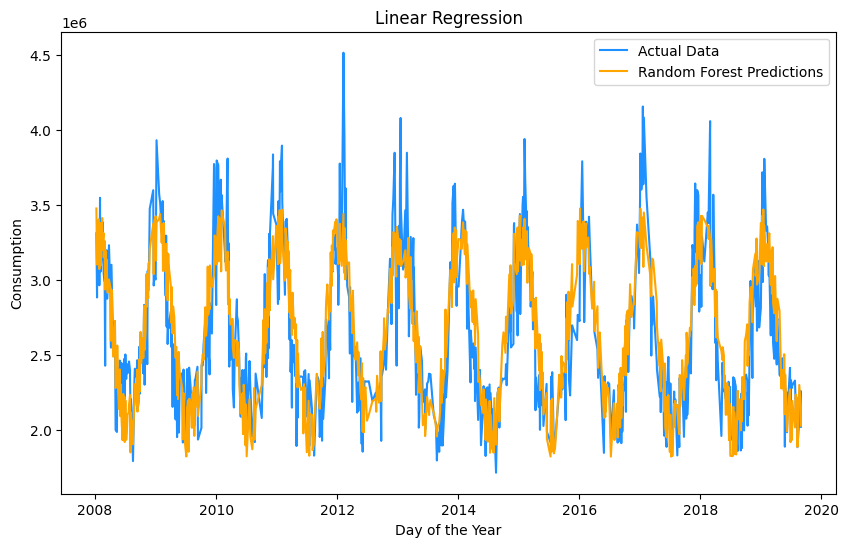

In [35]:
# Supposons que df contient la colonne Numero_jour
# Assure-toi que X_test et y_test ont le m√™me index que df
X_graphe =X_test.copy()
X_graphe['Numero_jour'] = data.loc[X_graphe.index, 'jour']  # R√©int√®gre Numero_jour dans X_graphe

# Cr√©e un DataFrame pour le graphique
graph_data = pd.DataFrame({
    'Numero_jour': X_graphe['Numero_jour'],
    'Actual': y_test.values,
    'Prediction': RL['predictions']
})

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.lineplot(x='Numero_jour', y='Actual', data=graph_data, color='dodgerblue', label='Actual Data', errorbar=None)
sns.lineplot(x='Numero_jour', y='Prediction', data=graph_data, color='orange', label='Random Forest Predictions', errorbar=None)

plt.title('Linear Regression')
plt.xlabel("Day of the Year")
plt.ylabel('Consumption')
plt.legend()
plt.show()


## 10. Entra√Ænement du Mod√®le : Random Forest

Essayons maintenant un mod√®le plus complexe, la For√™t Al√©atoire (Random Forest). Ce mod√®le bas√© sur les arbres de d√©cision peut capturer des relations non-lin√©aires et des interactions entre les caract√©ristiques, ce qui pourrait am√©liorer les performances par rapport √† la r√©gression lin√©aire.

Nous utilisons notre fonction `train_random_forest`.

In [ ]:
print("Entra√Ænement du mod√®le Random Forest...")
# Entra√Æner le mod√®le Random Forest
forest_results = train_random_forest(X_train, y_train, X_test, y_test) 

In [ ]:
# Afficher les r√©sultats du Random Forest de mani√®re lisible
print(f"Mod√®le Entra√Æn√© : {forest_results['model']}") 
print(f"MSE (Random Forest) sur l'ensemble de test : {forest_results['mse']:.2f}") 
print(f"Score R¬≤ (Random Forest) sur l'ensemble de test : {forest_results['r2']:.4f}")

{'model': RandomForestRegressor(random_state=42),
 'predictions': array([1852327.47394333, 1889736.614705  , 2729747.83829333,
        3489740.679665  , 3836664.11159   , 2302586.6535275 ,
        1862022.5728    , 2589115.12226333, 2063625.3389    ,
        2647449.75219   , 2403218.51385   , 3616245.18172   ,
        2374964.50976333, 2053923.24852683, 2453927.42998   ,
        2272051.1378    , 2302584.73109   , 2343651.84862   ,
        2935479.5493675 , 2656522.085585  , 2469185.01110834,
        2997522.55231   , 3326926.55701   , 2282973.28571   ,
        2343770.82357   , 2580611.29764   , 2247921.49530333,
        2137539.39267733, 1936984.13139   , 2494527.52578   ,
        2301818.01060667, 2097258.7453    , 2119080.31595   ,
        2817691.60950083, 3537474.53142   , 2278054.71122333,
        3117019.35581   , 3778463.85400833, 2161728.90247333,
        2710730.30857667, 2323841.05676333, 2522333.64567   ,
        2754672.37953   , 2622365.7313    , 2363761.08820333,
     

### 10.1. Visualisation des Pr√©dictions : Random Forest

Visualisons √©galement les pr√©dictions du mod√®le Random Forest par rapport aux valeurs r√©elles sur l'ensemble de test.

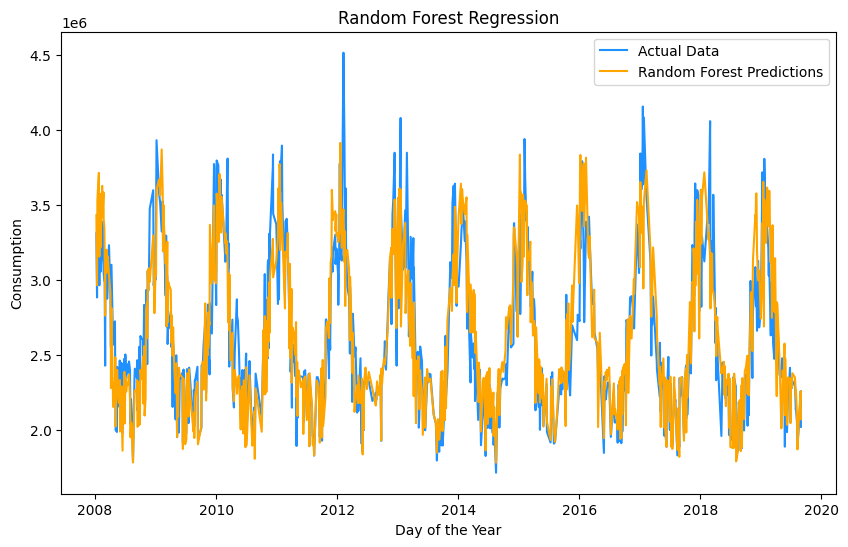

In [32]:
# Supposons que df contient la colonne Numero_jour
# Assure-toi que X_test et y_test ont le m√™me index que df
X_graphe =X_test.copy()
X_graphe['Numero_jour'] = data.loc[X_graphe.index, 'jour']  # R√©int√®gre Numero_jour dans X_graphe

# Cr√©e un DataFrame pour le graphique
graph_data = pd.DataFrame({
    'Numero_jour': X_graphe['Numero_jour'],
    'Actual': y_test.values,
    'Prediction': forest['predictions']
})

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.lineplot(x='Numero_jour', y='Actual', data=graph_data, color='dodgerblue', label='Actual Data', errorbar=None)
sns.lineplot(x='Numero_jour', y='Prediction', data=graph_data, color='orange', label='Random Forest Predictions', errorbar=None)

plt.title('Random Forest Regression')
plt.xlabel("Day of the Year")
plt.ylabel('Consumption')
plt.legend()
plt.show()


## 11. Entra√Ænement du Mod√®le : XGBoost

Enfin, entra√Ænons un mod√®le XGBoost (Extreme Gradient Boosting). C'est un algorithme de boosting de gradient tr√®s performant et populaire, souvent utilis√© dans les comp√©titions de data science pour sa pr√©cision et sa rapidit√© (relative).

Assurez-vous que la fonction `train_xgboost` est d√©finie de mani√®re similaire aux autres (dans `Functions/xgboost_model.py` ou `Functions/models.py`) et qu'elle retourne un dictionnaire avec les m√©triques.

In [15]:
XGB = train_xgboost(X_train,y_train,X_test,y_test)

In [ ]:
# Afficher les r√©sultats du Random Forest de mani√®re lisible
print(f"Mod√®le Entra√Æn√© : {XGB['model']}") 
print(f"MSE (Random Forest) sur l'ensemble de test : {XGB['mse']:.2f}") 
print(f"Score R¬≤ (Random Forest) sur l'ensemble de test : {XGB['r2']:.4f}")

{'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...),
 'predictions': array([2062725.2, 1923281.5, 2730987.2, 3558264. , 3496350.2, 2285351.8,
        1912044. , 2558472.8, 2112213.8, 2487980.8, 2327309.8, 3525715.5,
        2353453. , 2079193.8, 2441247.8, 2230215.2, 2328472.2, 2353166.2,
  

### 11.1. Visualisation des Pr√©dictions : XGBoost

Visualisons les pr√©dictions du mod√®le XGBoost par rapport aux valeurs r√©elles.

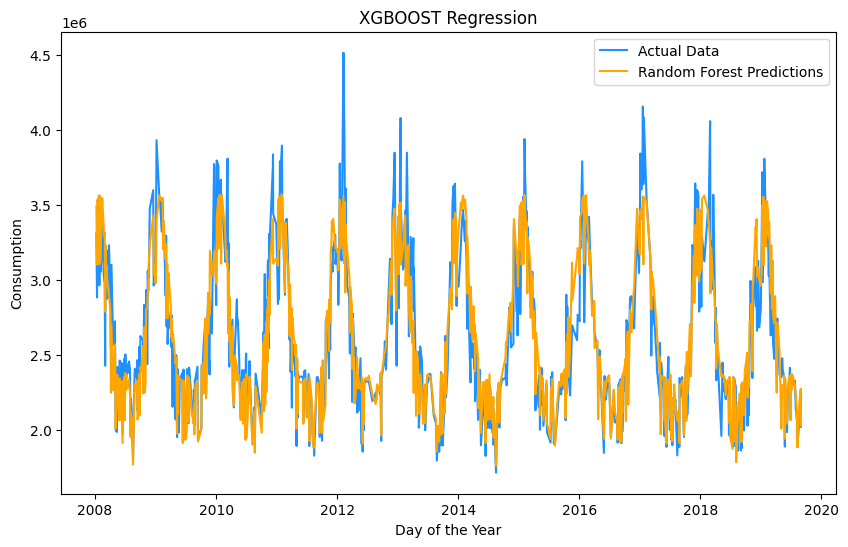

In [34]:
# Supposons que df contient la colonne Numero_jour
# Assure-toi que X_test et y_test ont le m√™me index que df
X_graphe =X_test.copy()
X_graphe['Numero_jour'] = data.loc[X_graphe.index, 'jour']  # R√©int√®gre Numero_jour dans X_graphe

# Cr√©e un DataFrame pour le graphique
graph_data = pd.DataFrame({
    'Numero_jour': X_graphe['Numero_jour'],
    'Actual': y_test.values,
    'Prediction': XGB['predictions']
})

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.lineplot(x='Numero_jour', y='Actual', data=graph_data, color='dodgerblue', label='Actual Data', errorbar=None)
sns.lineplot(x='Numero_jour', y='Prediction', data=graph_data, color='orange', label='Random Forest Predictions', errorbar=None)

plt.title('XGBOOST Regression')
plt.xlabel("Day of the Year")
plt.ylabel('Consumption')
plt.legend()
plt.show()

## 12. Comparaison des Mod√®les

Apr√®s avoir entra√Æn√© et √©valu√© nos trois mod√®les, comparons leurs performances sur l'ensemble de test en utilisant les m√©triques MSE (Mean Squared Error) et R¬≤ (Coefficient de D√©termination). Rappelons que pour le MSE, plus la valeur est basse, mieux c'est, tandis que pour le R¬≤, plus la valeur est proche de 1, mieux c'est.

| Mod√®le              | MSE (Erreur Quadratique Moyenne) | R¬≤ (Coefficient de D√©termination) |
| :------------------ | :-----------------------------: | :------------------------------: |
| R√©gression Lin√©aire |       62 196 382 742.90         |              0.7737              |
| Random Forest       |       54 250 756 288.30         |              0.8026              |
| **XGBoost** |     **39 334 028 295.12** |            **0.8569** |

*(Note : Les valeurs de MSE sont tr√®s grandes car elles repr√©sentent le carr√© de l'erreur sur la consommation, qui est elle-m√™me un grand nombre.)*

**Analyse :**
En se basant sur ces m√©triques, le mod√®le **XGBoost** est clairement le plus performant des trois mod√®les test√©s. Il pr√©sente l'erreur quadratique moyenne (MSE) la plus faible et le coefficient de d√©termination (R¬≤) le plus √©lev√©. Cela indique qu'il explique la plus grande partie de la variance de la consommation √©lectrique (environ 85.7%) dans l'ensemble de test, tout en ayant l'erreur de pr√©diction moyenne la plus faible.


# III. Pr√©visions Futures

Maintenant que nous avons entra√Æn√©, √©valu√© et s√©lectionn√© notre meilleur mod√®le (supposons que ce soit XGBoost d'apr√®s la comparaison pr√©c√©dente), nous pouvons l'utiliser pour faire ce pour quoi il a √©t√© con√ßu : pr√©voir la consommation √©lectrique pour des dates futures pour lesquelles nous n'avons pas encore de donn√©es r√©elles.

## 13. Cr√©ation des Dates Futures

D√©finissons d'abord la p√©riode future pour laquelle nous souhaitons obtenir des pr√©visions. Ici, nous allons g√©n√©rer les dates du 1er septembre 2019 jusqu'au 31 d√©cembre 2020.

In [ ]:
# D√©finir la plage de dates futures
start_date = '2019-09-01' 
end_date = '2020-12-31'  

print(f"G√©n√©ration des dates futures de {start_date} √† {end_date}...")
future_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Cr√©er un DataFrame avec ces dates
future_df = pd.DataFrame({'jour': future_dates})

display(future_df.head())
display(future_df.tail())
print(f"Nombre de jours futurs g√©n√©r√©s : {len(future_df)}")

## 14. Application du Feature Engineering aux Dates Futures

Pour que notre mod√®le puisse faire des pr√©dictions sur ces dates futures, nous devons leur appliquer **exactement les m√™mes √©tapes de feature engineering** que celles appliqu√©es √† nos donn√©es d'entra√Ænement. Cela inclut l'extraction des caract√©ristiques temporelles (jour, mois) et leur transformation cyclique (sin/cos).

In [ ]:
# In [19]: # Renum√©rot√© logiquement
print("Application du feature engineering aux dates futures...")

# Appliquer l'extraction jour/mois (si n√©cessaire pour extract_features)
future_df = extract_dayMonth(future_df, 'jour') 

# Appliquer l'encodage cyclique sin/cos
future_df = extract_features(future_df)

print("Aper√ßu des caract√©ristiques g√©n√©r√©es pour les dates futures :")
display(future_df.head(15)) 

## 15. G√©n√©ration des Pr√©dictions Futures

Avec les caract√©ristiques pr√™tes pour nos dates futures, nous utilisons notre meilleur mod√®le entra√Æn√© (XGBoost, stock√© dans `XGB_results['model']`) pour pr√©dire la consommation. Il est crucial de s'assurer que les colonnes de `X_future` correspondent exactement (m√™me nom, m√™me ordre) √† celles utilis√©es pour l'entra√Ænement (`X_train.columns`).

In [ ]:
print("Pr√©paration des donn√©es X_future pour la pr√©diction...")

# S√©lectionner uniquement les colonnes qui ont √©t√© utilis√©es pour l'entra√Ænement du mod√®le
# C'est une √©tape CRUCIALE pour √©viter les erreurs.
required_features = X_train.columns # R√©cup√©rer les noms des colonnes d'entra√Ænement
X_future = future_df[required_features] 

print(f"Colonnes utilis√©es pour la pr√©diction future : {X_future.columns.tolist()}")

# Utiliser le mod√®le XGBoost entra√Æn√© pour faire les pr√©dictions
if XGB: # V√©rifier que le mod√®le XGB a bien √©t√© entra√Æn√©
    print("Effectuer les pr√©dictions avec le mod√®le XGBoost...")
    future_predictions = XGB['model'].predict(X_future)
    
    # Ajouter les pr√©dictions au DataFrame future_df
    future_df['consommation'] = future_predictions
    print("Pr√©dictions ajout√©es au DataFrame future_df.")
else:
    print("Le mod√®le XGBoost n'√©tant pas disponible, aucune pr√©diction future n'a √©t√© faite.")


### 15.1. Affichage des Pr√©dictions Futures

Visualisons le DataFrame r√©sultant qui contient maintenant les dates futures, les caract√©ristiques associ√©es, et la colonne `consommation` pr√©dite par notre mod√®le.

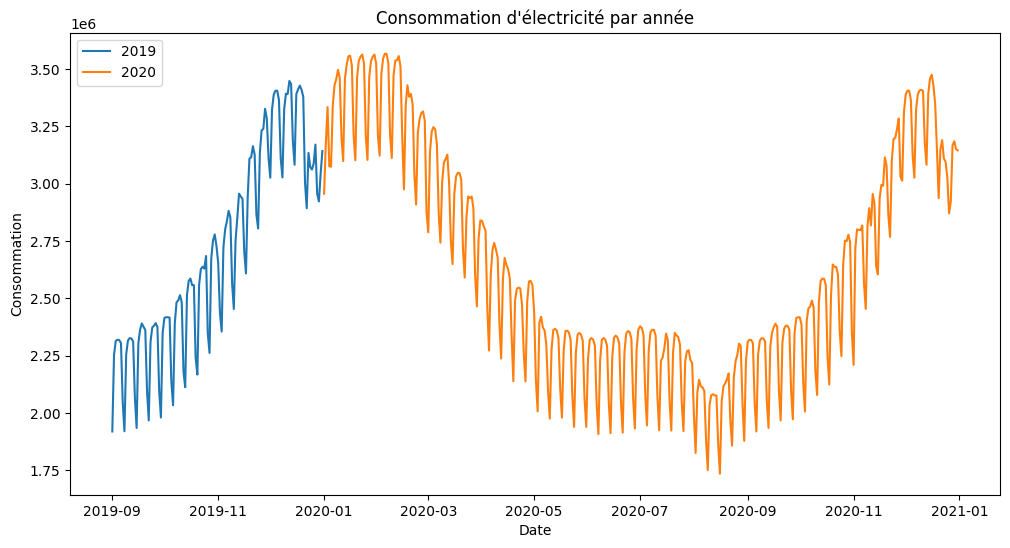

In [22]:
plot_consommation_par_annee(future_df)

## 17. Comparaison Visuelle : R√©el 2019 vs Pr√©dit 2020

Pour avoir une id√©e de la plausibilit√© de nos pr√©dictions pour 2020, comparons-les visuellement au comportement r√©el observ√© lors de la derni√®re ann√©e compl√®te dont nous disposons dans nos donn√©es originales (ici, 2019). Cela ne valide pas quantitativement les pr√©dictions mais donne une appr√©ciation visuelle de la continuit√© des motifs saisonniers pr√©dits.

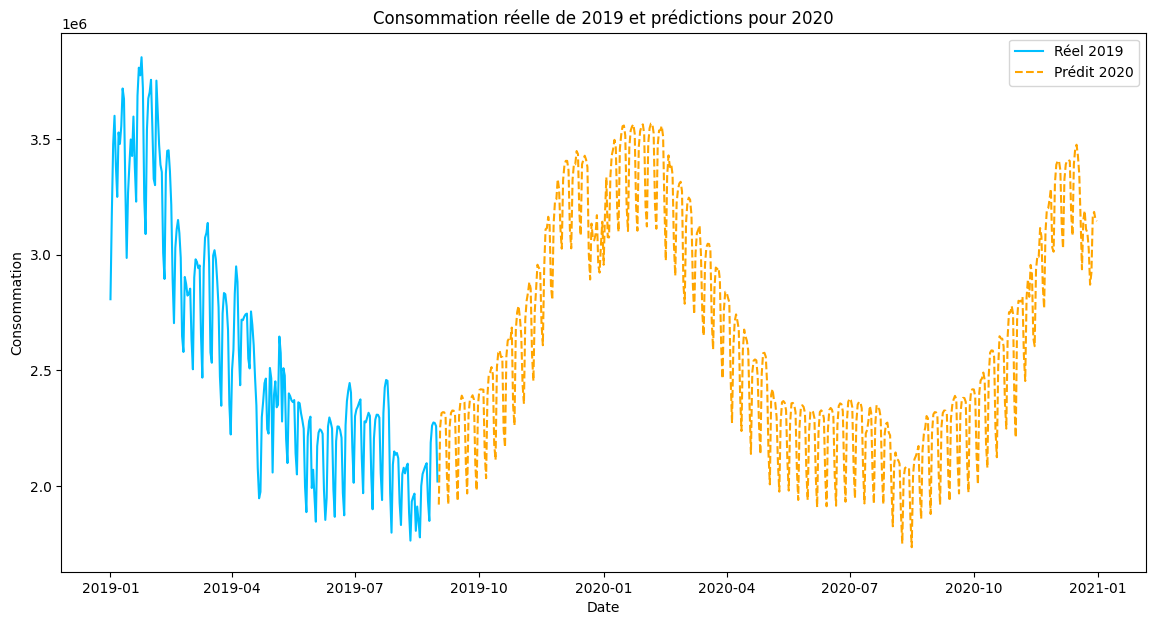

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Supposons que vos donn√©es sont d√©j√† charg√©es dans un DataFrame appel√© `data`
# et que les pr√©dictions pour 2020 sont dans un DataFrame appel√© `future_df`

# Extraire les donn√©es de 2019 en utilisant la colonne `Annee`
data_2019 = data[data['Annee'] == 2019]

# Extraire les pr√©dictions pour 2020
predictions_2020 = future_df

# Visualiser les r√©sultats avec des couleurs diff√©rentes
plt.figure(figsize=(14, 7))

# Tracer les donn√©es r√©elles de 2019
plt.plot(data_2019['jour'], data_2019['consommation'], label='R√©el 2019', color='deepskyblue')

# Tracer les pr√©dictions pour 2020
plt.plot(predictions_2020['jour'], predictions_2020['consommation'], label='Pr√©dit 2020', color='orange', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Consommation')
plt.title('Consommation r√©elle de 2019 et pr√©dictions pour 2020')
plt.legend()
plt.show()


# IV. Suivi des Exp√©riences avec MLflow

Pour assurer la reproductibilit√© de nos entra√Ænements, comparer facilement les performances des diff√©rents mod√®les et de leurs hyperparam√®tres, et g√©rer le cycle de vie de nos mod√®les, nous allons utiliser MLflow Tracking. Nous configurerons MLflow pour qu'il envoie les informations de suivi (runs, param√®tres, m√©triques, mod√®les) vers un serveur distant h√©berg√© sur DagsHub, qui s'int√®gre bien avec les d√©p√¥ts Git.

## 18. Importation des Biblioth√®ques MLflow et DagsHub

Commen√ßons par importer les biblioth√®ques n√©cessaires pour MLflow et l'int√©gration DagsHub.

In [ ]:
import mlflow
import mlflow.sklearn        # Pour logguer les mod√®les scikit-learn
import mlflow.xgboost        # Pour logguer les mod√®les XGBoost
from mlflow.models.signature import infer_signature # Pour d√©finir le sch√©ma d'entr√©e/sortie du mod√®le
import os                    # Pour lire les variables d'environnement (s√©curit√©)

print("Biblioth√®ques MLflow import√©es.")

## 19. Initialisation de DagsHub

Nous utilisons la biblioth√®que `dagshub` pour initialiser la connexion √† notre d√©p√¥t DagsHub et configurer automatiquement MLflow pour utiliser le serveur de tracking MLflow associ√© √† ce d√©p√¥t.

In [ ]:
# In [25]: # Renum√©rot√©
import dagshub

# Remplacez par votre nom d'utilisateur et nom de d√©p√¥t DagsHub
repo_owner = 'kadermamoudou88'
repo_name = 'MLOPS-project'

print(f"Initialisation de DagsHub pour le d√©p√¥t : {repo_owner}/{repo_name}")
try:
    # Initialise la connexion et configure l'URI de tracking MLflow
    # S'assure que l'authentification est g√©r√©e (via variables d'env. ou login CLI)
    dagshub.init(repo_owner=repo_owner, repo_name=repo_name, mlflow=True)
    print(f"D√©p√¥t {repo_owner}/{repo_name} initialis√© avec MLflow.")
    # Vous pouvez v√©rifier l'URI configur√© si besoin :
    # print(f"MLflow Tracking URI configur√© : {mlflow.get_tracking_uri()}") 
except Exception as e:
    print(f"ERREUR lors de l'initialisation de DagsHub : {e}")
    print("Assurez-vous d'√™tre authentifi√© (login DagsHub CLI ?) et que les variables d'environnement d'authentification MLflow sont correctement d√©finies si n√©cessaire.")

Accessing as kadermamoudou88

Initialized MLflow to track repo "kadermamoudou88/MLOPS-project"

Repository kadermamoudou88/MLOPS-project initialized!

## 20. Configuration de l'Authentification MLflow (S√©curit√© !)

**Ceci est une √©tape CRUCIALE pour la s√©curit√©.** Pour permettre √† MLflow d'√©crire sur votre serveur DagsHub distant, il doit s'authentifier. **Ne codez JAMAIS vos mots de passe ou tokens directement dans le notebook.** Utilisez plut√¥t des variables d'environnement.

**Action Requise (Hors Notebook) :**
Avant d'ex√©cuter la suite, assurez-vous d'avoir d√©fini les variables d'environnement suivantes dans votre terminal ou syst√®me :

1.  `MLFLOW_TRACKING_USERNAME` : Votre nom d'utilisateur DagsHub (`kadermamoudou88`).
2.  `MLFLOW_TRACKING_PASSWORD` : Votre **nouveau** token d'acc√®s DagsHub (celui que vous avez g√©n√©r√© apr√®s avoir r√©voqu√© l'ancien qui √©tait expos√©).

**Exemple (√† ex√©cuter dans votre terminal, PAS ici) :**
```bash
# Sur Linux/macOS: 
export MLFLOW_TRACKING_USERNAME='kadermamoudou88'
export MLFLOW_TRACKING_PASSWORD='VOTRE_NOUVEAU_TOKEN_SECRET' 

# Sur Windows (CMD): 
set MLFLOW_TRACKING_USERNAME=kadermamoudou88
set MLFLOW_TRACKING_PASSWORD=VOTRE_NOUVEAU_TOKEN_SECRET

## 21. D√©finition de l'Exp√©rience et Pr√©paration du Logging

Nous allons maintenant d√©finir le nom de l'exp√©rience sous laquelle nos runs seront group√©es dans MLflow. Nous pr√©parons √©galement la structure pour logger les informations de chaque mod√®le entra√Æn√© pr√©c√©demment (R√©gression Lin√©aire, Random Forest, XGBoost).

**Note Importante sur les Param√®tres :** Le code ci-dessous loggue les hyperparam√®tres pour chaque mod√®le. J'ai inclus les valeurs par d√©faut d√©finies dans vos fonctions `train_...`. **Si vous avez appel√© ces fonctions avec des valeurs diff√©rentes lors de l'entra√Ænement r√©el (cellules `In [9]`, `In [12]`, `In [15]`), vous devez imp√©rativement mettre √† jour le dictionnaire `model_params` ci-dessous pour refl√©ter ces valeurs r√©elles**, sinon les param√®tres loggu√©s dans MLflow seront incorrects.

In [ ]:
# Configuration des variables d'environnement pour l'authentification avec le serveur MLflow h√©berg√© sur DagsHub.
# MLFLOW_TRACKING_USERNAME : Nom d'utilisateur pour DagsHub.
# MLFLOW_TRACKING_PASSWORD : Token d'acc√®s pour authentification s√©curis√©e.
# MLFLOW_TRACKING_URI : URI du serveur distant MLflow pour le suivi des exp√©rimentations.
import os 
os.environ['MLFLOW_TRACKING_USERNAME'] = 'kadermamoudou88'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'blablabla'
os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/kadermamoudou88/MLOPS-project.mlflow'

In [ ]:
# Configuration de l'exp√©rience MLflow
mlflow.set_experiment("Energy forecasting")
mlflow.set_tracking_uri('https://dagshub.com/kadermamoudou88/MLOPS-project.mlflow')
# Liste des mod√®les
models = [
    ("Linear Regression", RL_results),
    ("Random Forest", forest_results),
    ("XGBoost", XGB),
]

for model_name, model_dict in models:
    model = model_dict["model"]
    y_pred = model_dict["predictions"]
    mse = model_dict["mse"]
    r2 = model_dict["r2"]

    # Journalisation avec MLflow
    input_example = X_train.head(1).to_dict(orient="list")
    with mlflow.start_run(run_name=model_name):
        mlflow.log_metrics({"mse": mse, "r2": r2})

        if model_name == "XGBoost":
            mlflow.xgboost.log_model(
                model, "model",
                input_example=input_example,
                signature=infer_signature(X_train, y_train)
            )
        else:
            mlflow.sklearn.log_model(
                model, "model",
                input_example=input_example,
                signature=infer_signature(X_train, y_train)
            )

üèÉ View run Linear Regression at: https://dagshub.com/kadermamoudou88/MLOPS-project.mlflow/#/experiments/1/runs/9f4c0280ee244899a8f2ea5e75533758
üß™ View experiment at: https://dagshub.com/kadermamoudou88/MLOPS-project.mlflow/#/experiments/1


üèÉ View run Random Forest at: https://dagshub.com/kadermamoudou88/MLOPS-project.mlflow/#/experiments/1/runs/b3916aefa4374769bf6ddeee26854df5
üß™ View experiment at: https://dagshub.com/kadermamoudou88/MLOPS-project.mlflow/#/experiments/1


c:\Users\derka\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2024/12/20 12:32:30 WARNING mlflow.utils.requirements_utils: Failed to run predict on input_example, dependencies introduced in predict are not captured.
TypeError("Not supported type for data.<class 'dict'>")Traceback (most recent call last):


  File "c:\Users\derka\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\utils\_capture_modules.py", line 166, in load_model_and_predict
    model.predict(input_example, params=params)


  File "c:\Users\derka\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\xgboost\__init__.py", line 376

üèÉ View run XGBoost at: https://dagshub.com/kadermamoudou88/MLOPS-project.mlflow/#/experiments/1/runs/b915a9f2ad084b80bacec650aeac7877
üß™ View experiment at: https://dagshub.com/kadermamoudou88/MLOPS-project.mlflow/#/experiments/1


## 23. Consulter les R√©sultats dans MLflow

lien vers notre MLFLOW : https://dagshub.com/kadermamoudou88/MLOPS-project.mlflow/#/experiments/1?viewStateShareKey=d537fdc0c959fa49a2e0b67727b54010fcd4ffd194d195a2598ac3fdf5c6e596

# V. Conclusion Finale et Prochaines √âtapes

Ce notebook a pr√©sent√© une d√©marche compl√®te pour aborder le probl√®me de la pr√©vision de la consommation √©lectrique quotidienne en France, une t√¢che essentielle pour RTE. En partant des donn√©es brutes, nous avons explor√©, nettoy√©, et enrichi les donn√©es par un feature engineering adapt√© aux caract√©ristiques temporelles cycliques.

Nous avons ensuite entra√Æn√© et √©valu√© rigoureusement trois mod√®les de Machine Learning distincts : R√©gression Lin√©aire, Random Forest et XGBoost. La comparaison bas√©e sur les m√©triques MSE et R¬≤ a clairement d√©sign√© **XGBoost comme le mod√®le le plus performant** pour cette t√¢che sur nos donn√©es, atteignant un **score R¬≤ d'environ 0.857** sur l'ensemble de test.

L'int√©gration du suivi des exp√©riences avec **MLflow et DagsHub** a √©t√© mise en place, permettant une meilleure organisation, reproductibilit√© et comparaison des diff√©rents entra√Ænements, bien que le logging ait √©t√© ajout√© post-entra√Ænement dans cette version. Le mod√®le final a √©t√© utilis√© pour g√©n√©rer des pr√©visions sur une p√©riode future, dont la plausibilit√© a √©t√© √©valu√©e visuellement par rapport aux donn√©es historiques r√©centes.

Bien que les r√©sultats soient encourageants, plusieurs pistes d'am√©lioration existent :
* L'ajout de **donn√©es externes cruciales**, comme les informations m√©t√©orologiques (temp√©rature notamment).
* Une **optimisation fine des hyperparam√®tres** des mod√®les.
* L'exploration de **mod√®les plus sp√©cialis√©s** en s√©ries temporelles (Prophet, LSTM...).
* Une **validation crois√©e temporelle** plus stricte lors de l'entra√Ænement et de l'√©valuation.

En conclusion, ce projet a permis de construire un pipeline fonctionnel pour la pr√©vision de consommation √©lectrique, d√©montrant l'application r√©ussie de techniques de Machine Learning et de bonnes pratiques MLOps (via MLflow/DagsHub) sur un cas d'usage concret et pertinent.